In [316]:
import os
import re
import numpy as np
os.chdir('/home/gerald/Documents/These/SystemX/fork/EM_Hyperbolic/')
from launcher_tools import logger
print(os.getcwd())

/home/gerald/Documents/These/SystemX/fork/EM_Hyperbolic


In [394]:
import torch
def get_values(regex):
    size = [2,3,4,5,10]
    size_inv = {2:0,3:1,4:2,5:3,10:4}
    MEANS = [0,0,0,0,0]
    VAR =[0,0,0,0,0]
    RES = [[],[],[],[],[]]
    STD_KM = [[],[],[],[],[]]
    directory_list = list()
    for root, dirs, files in os.walk("/local/gerald/EVAL_DBLP/", topdown=False):
        for name in dirs:
            if re.search(regex, name) is not None:
                directory_list.append(os.path.join(root, name))
    
    STD_KM_MAX = [[],[],[],[],[]]
    for i in directory_list:
        print(i)
        
        log = logger.JSONLogger(i+"/log.json", mod="continue")
        RES[size_inv[log["size"]]].append(log["kmeans_from_embeddings"]["RES"])
        STD_KM[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).sum(-1).tolist())
        STD_KM_MAX[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).topk(2,-1)[0][:,1].tolist())
    
    print([ len(r) for r in RES])
    
    #print(RES)
    res = torch.Tensor(RES)
    std_km = torch.Tensor(STD_KM)
    std_km_max = torch.Tensor(STD_KM_MAX)
    #print(res.size())
    #print(std_km.min(-1)[1])
    #print(std_km.size())
    A_index = torch.arange(5).unsqueeze(-1).expand(5,10).flatten()
    B_index = torch.arange(10).unsqueeze(0).expand(5,10).flatten()
    criterion_mean_index = std_km.min(-1)[1].flatten()
    criterion_max_index = std_km_max.min(-1)[1].flatten()
    criterion_mean = res[A_index, B_index, criterion_mean_index].view(5,10)
    criterion_max = res[A_index, B_index, criterion_max_index].view(5,10)
    return (criterion_mean.mean(-1).tolist(), criterion_mean.std(-1).tolist(),criterion_mean.max(-1)[0].tolist(), 
            criterion_max.mean(-1).tolist(), criterion_max.std(-1).tolist(), criterion_max.max(-1)[0].tolist()
            )

In [392]:
import torch
def get_values(regex):
    size = [2,3]
    size_inv = {2:0,3:1}
    MEANS = [0,0]
    VAR =[0,0]
    RES = [[],[]]
    STD_KM = [[],[]]
    directory_list = list()
    for root, dirs, files in os.walk("/local/gerald/AISTATISSUE2/", topdown=False):
        for name in dirs:
            if re.search(regex, name) is not None:
                directory_list.append(os.path.join(root, name))
    
    STD_KM_MAX = [[],[]]
    for i in directory_list:
        print(i)
        
        log = logger.JSONLogger(i+"/log.json", mod="continue")
        RES[size_inv[log["size"]]].append(log["kmeans_from_embeddings"]["RES"])
        STD_KM[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).sum(-1).tolist())
        STD_KM_MAX[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).topk(2,-1)[0][:,1].tolist())
    
#     print([ len(r) for r in RES])
    
#     print(RES)
    res = torch.Tensor(RES)
    std_km = torch.Tensor(STD_KM)
#     print(STD_KM_MAX)
    std_km_max = torch.Tensor(STD_KM_MAX)
#     print(res.size())
#     print(std_km.min(-1)[1])
#     print(std_km.size())
    A_index = torch.arange(5).unsqueeze(-1).expand(2,10).flatten()
    B_index = torch.arange(10).unsqueeze(0).expand(2,10).flatten()
    criterion_mean_index = std_km.min(-1)[1].flatten()
    criterion_max_index = std_km_max.min(-1)[1].flatten()
    criterion_mean = res[A_index, B_index, criterion_mean_index].view(2,10)
    criterion_max = res[A_index, B_index, criterion_max_index].view(2,10)
    return (criterion_mean.mean(-1).tolist(), criterion_mean.std(-1).tolist(),criterion_mean.max(-1)[0].tolist(), 
            criterion_max.mean(-1).tolist(), criterion_max.std(-1).tolist(), criterion_max.max(-1)[0].tolist()
            )

In [ ]:
import torch
def get_values(regex):
    size = [2,3,4,5,10]
    size_inv = {2:0,3:1,4:2,5:3,10:4}
    MEANS = [0,0,0,0,0]
    VAR =[0,0,0,0,0]
    RES = [[],[],[],[],[]]
    STD_KM = [[],[],[],[],[]]
    directory_list = list()
    for root, dirs, files in os.walk("/local/gerald/EVAL_DBLP/", topdown=False):
        for name in dirs:
            if re.search(regex, name) is not None:
                directory_list.append(os.path.join(root, name))
    
    STD_KM_MAX = [[],[],[],[],[]]
    for i in directory_list:
        print(i)
        
        log = logger.JSONLogger(i+"/log.json", mod="continue")
        RES[size_inv[log["size"]]].append(log["kmeans_from_embeddings"]["RES"])
        STD_KM[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).sum(-1).tolist())
        STD_KM_MAX[size_inv[log["size"]]].append(torch.Tensor(log["kmeans_from_embeddings"]["STD_KMEANS"]).topk(2,-1)[0][:,1].tolist())
    
    print([ len(r) for r in RES])
    
    #print(RES)
    res = torch.Tensor(RES)
    std_km = torch.Tensor(STD_KM)
    std_km_max = torch.Tensor(STD_KM_MAX)
    #print(res.size())
    #print(std_km.min(-1)[1])
    #print(std_km.size())
    A_index = torch.arange(2).unsqueeze(-1).expand(2,10).flatten()
    B_index = torch.arange(10).unsqueeze(0).expand(2,10).flatten()
    criterion_mean_index = std_km.min(-1)[1].flatten()
    criterion_max_index = std_km_max.min(-1)[1].flatten()
    criterion_mean = res[A_index, B_index, criterion_mean_index].view(2,10)
    criterion_max = res[A_index, B_index, criterion_max_index].view(2,10)
    return (criterion_mean.mean(-1).tolist(), criterion_mean.std(-1).tolist(),criterion_mean.max(-1)[0].tolist(), 
            criterion_max.mean(-1).tolist(), criterion_max.std(-1).tolist(), criterion_max.max(-1)[0].tolist()
            )

In [395]:
cmmh, cmsh, cmxh, cxmh, cxsh, cxxh = get_values("dblp-big-\d+D-KMEANS-.*")

cmme, cmse, cmxe, cxme, cxse, cxxe= get_values("dblp-big-euclidean-\d+D-KMEANS.*")

/local/gerald/EVAL_DBLP/dblp-big-4D-KMEANS-05
/local/gerald/EVAL_DBLP/dblp-big-2D-KMEANS-09
/local/gerald/EVAL_DBLP/dblp-big-10D-KMEANS-07
/local/gerald/EVAL_DBLP/dblp-big-2D-KMEANS-08
/local/gerald/EVAL_DBLP/dblp-big-5D-KMEANS-08
/local/gerald/EVAL_DBLP/dblp-big-3D-KMEANS-02
/local/gerald/EVAL_DBLP/dblp-big-3D-KMEANS-03
/local/gerald/EVAL_DBLP/dblp-big-4D-KMEANS-09
/local/gerald/EVAL_DBLP/dblp-big-3D-KMEANS-09
/local/gerald/EVAL_DBLP/dblp-big-4D-KMEANS-02
/local/gerald/EVAL_DBLP/dblp-big-5D-KMEANS-03
/local/gerald/EVAL_DBLP/dblp-big-2D-KMEANS-03
/local/gerald/EVAL_DBLP/dblp-big-3D-KMEANS-06
/local/gerald/EVAL_DBLP/dblp-big-4D-KMEANS-01
/local/gerald/EVAL_DBLP/dblp-big-5D-KMEANS-05
/local/gerald/EVAL_DBLP/dblp-big-3D-KMEANS-01
/local/gerald/EVAL_DBLP/dblp-big-4D-KMEANS-06
/local/gerald/EVAL_DBLP/dblp-big-2D-KMEANS-05
/local/gerald/EVAL_DBLP/dblp-big-10D-KMEANS-10
/local/gerald/EVAL_DBLP/dblp-big-5D-KMEANS-01
/local/gerald/EVAL_DBLP/dblp-big-10D-KMEANS-03
/local/gerald/EVAL_DBLP/dblp-bi

In [332]:
print(cmxh)

[71.38956451416016]


<IPython.core.display.Javascript object>


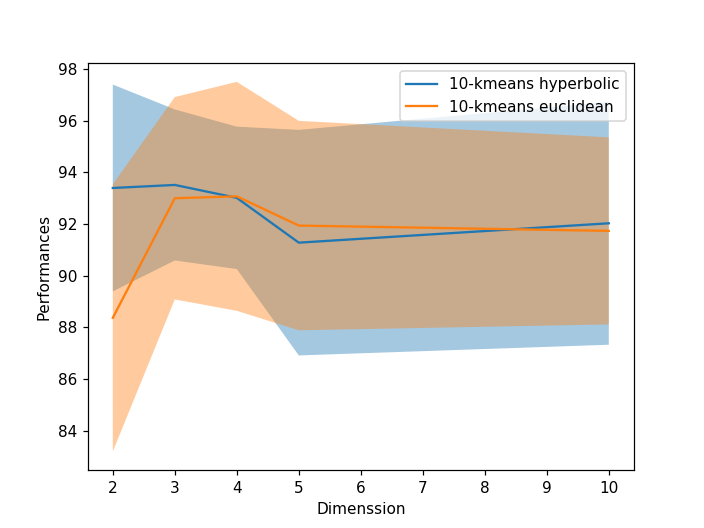

In [325]:
from matplotlib import pyplot as plt
%matplotlib nbagg
import numpy as np
size = SIZE_A
var = np.array(VAR_A)
mean = np.array(MEANS_A)
plt.plot(size, MEANS_A, label="10-kmeans hyperbolic")
plt.ylabel("Performances")
plt.xlabel("Dimenssion")
plt.fill_between(size, mean-var, mean+var, alpha=0.4)

var = np.array(VAR_B)
mean = np.array(MEANS_B)
plt.plot(size, MEANS_B, label="10-kmeans euclidean")
plt.fill_between(size, mean-var, mean+var, alpha=0.4)
plt.legend()


In [396]:
def table_latex(size, cmmh, cmsh, cmxh, cxmh, cxsh, cxxh, cmme, cmse, cmxe, cxme, cxse, cxxe):
    mstr="\\begin{table} \n \t \centering \n \t \\begin{tabular}{|c|cccc|cccc|}\n"
    mstr+= "\t\t\hline Dimension & H-A-Mean & H-A-Max & H-B-Mean & H-B-Max & E-A-Mean & E-A-Max & E-B-Mean & E-B-Max\\\\ \hline\n"
    
    for sizei, cmmhi, cmshi, cmxhi, cxmhi, cxshi, cxxhi, cmmei, cmsei, cmxei, cxmei, cxsei, cxxei in zip(size, cmmh, cmsh, cmxh, cxmh, cxsh, cxxh, cmme, cmse, cmxe, cxme, cxse, cxxe):
        
        cmmhi, cmshi, cmxhi, cxmhi, cxshi, cxxhi = str(cmmhi*10//1/10),str(cmshi*10//1/10), str(cmxhi*10//1/10), str(cxmhi*10//1/10), str(cxshi*10//1/10), str(cxxhi*10//1/10)
        cmmei, cmsei, cmxei, cxmei, cxsei, cxxei = str(cmmei*10//1/10) ,str(cmsei*10//1/10), str(cmxei*10//1/10), str(cxmei*10//1/10), str(cxsei*10//1/10), str(cxxei*10//1/10)
        mstr += "\t\t"
        mstr += str(sizei)
        mstr += "&$"+cmmhi +" \pm "+ cmshi + "$&$"+cmxhi +"$&$"+cxmhi +" \pm "+ cxshi + "$&$" + cxxhi +"$"
        mstr += "&$"+cmmei +" \pm "+ cmsei + "$&$"+cmxei +"$&$"+cxmei +" \pm"+ cxsei + "$&$" + cxxei +"$\\\\ \hline\n"
    mstr+="\t\end{tabular}\n \end{table}"
    return mstr
    

In [397]:
print(table_latex(size, cmmh, cmsh, cmxh, cxmh, cxsh, cxxh, cmme, cmse, cmxe, cxme, cxse, cxxe))

\begin{table} 
 	 \centering 
 	 \begin{tabular}{|c|cccc|cccc|}
		\hline Dimension & H-A-Mean & H-A-Max & H-B-Mean & H-B-Max & E-A-Mean & E-A-Max & E-B-Mean & E-B-Max\\ \hline
		2&$53.7 \pm 10.1$&$74.3$&$49.4 \pm 9.5$&$62.3$&$72.1 \pm 5.7$&$78.6$&$68.0 \pm7.0$&$78.5$\\ \hline
		3&$70.4 \pm 6.1$&$75.8$&$57.3 \pm 9.1$&$73.4$&$77.4 \pm 2.2$&$80.8$&$71.5 \pm8.6$&$80.8$\\ \hline
		4&$74.0 \pm 5.0$&$81.4$&$61.0 \pm 8.5$&$74.1$&$80.1 \pm 2.7$&$83.1$&$72.6 \pm10.5$&$83.1$\\ \hline
		5&$72.7 \pm 3.5$&$78.9$&$54.4 \pm 9.3$&$71.4$&$81.6 \pm 1.8$&$84.5$&$75.4 \pm11.3$&$84.8$\\ \hline
		10&$75.4 \pm 1.2$&$77.0$&$63.6 \pm 9.0$&$75.7$&$82.5 \pm 0.5$&$83.2$&$63.7 \pm10.2$&$83.0$\\ \hline
	\end{tabular}
 \end{table}
